# Single Graph Drawing

#### Load packages

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

#### Load data

In [2]:
# This is a sampling for entire analysis
data_astronomy1 = pd.read_excel('data/Astronomy.xlsx', sheet_name='강민철')
data_astronomy2 = pd.read_excel('data/Astronomy.xlsx', sheet_name='강지헌')

# Drop an useless column
data_astronomy1.drop('Name', axis=1, inplace=True)
data_astronomy2.drop('Name', axis=1, inplace=True)

# Merge all dataframes into one dataframe:
data_astronomy = pd.concat([data_astronomy1, data_astronomy2], axis=0)
data_astronomy.drop(data_astronomy.loc[data_astronomy['ID'] == 53].index[0], inplace=True)
# data_astronomy

In [3]:
data_sampling1 = pd.read_excel('data/Sampling.xlsx', sheet_name='강지헌')
data_sampling2 = pd.read_excel('data/Sampling.xlsx', sheet_name='신아현')
data_sampling3 = pd.read_excel('data/Sampling.xlsx', sheet_name='신수연')

data_sampling1.drop('Name', axis=1, inplace=True)
data_sampling2.drop('Name', axis=1, inplace=True)
data_sampling3.drop('Name', axis=1, inplace=True)

data_sampling = pd.concat([data_sampling1, data_sampling2, data_sampling3], axis=0)
# data_sampling

In [4]:
data_database1 = pd.read_excel('data/Database.xlsx', sheet_name='신수연')
data_database2 = pd.read_excel('data/Database.xlsx', sheet_name='양연선')
data_database3 = pd.read_excel('data/Database.xlsx', sheet_name='김나영')

data_database1.drop('Name', axis=1, inplace=True)
data_database2.drop('Name', axis=1, inplace=True)
data_database3.drop('Name', axis=1, inplace=True)

data_database = pd.concat([data_database1, data_database2, data_database3], axis=0)
# data_database

#### Process graphs
- 이름 형식: `<Domain>_<Modality>_<ID>`
- Domain: `ASTRONOMY`, `SAMPLING`, `DATABASE`

In [5]:
graphs_astronomy = {}

for id, sub_df in data_astronomy.groupby('ID'):
    # New graph object
    graph_name = f"Astronomy_{sub_df['Mod.'].iloc[0]}_{sub_df['ID'].iloc[0]}"
    G = nx.DiGraph()
    
    # Add nodes and edges
    for _, row in sub_df.iterrows():
        start_node = row['Start']
        if pd.notna(row['End']):
            end_nodes = [end_node.rstrip() for end_node in row['End'].split(',')]
            for end_node in end_nodes:
                G.add_edge(start_node, end_node)
        # Add p.knowledge labels:  O -> 1(true)  |  X -> 0(false)
        try:
            G.nodes[start_node]['P.Knowledge'] = 1 if row['P.Knowledge'] == 'O' else 0
        except KeyError:
            G.add_node(start_node)
            G.nodes[start_node]['P.Knowledge'] = 0
    
    # Save the graph
    graphs_astronomy[graph_name] = G

In [6]:
graphs_sampling = {}

for id, sub_df in data_sampling.groupby('ID'):
    # New graph object
    graph_name = f"Sampling_{sub_df['Mod.'].iloc[0]}_{sub_df['ID'].iloc[0]}"
    G = nx.DiGraph()
    
    # Add nodes and edges
    for _, row in sub_df.iterrows():
        start_node = row['Start']
        if pd.notna(row['End']):
            end_nodes = [end_node.rstrip() for end_node in row['End'].split(',')]
            for end_node in end_nodes:
                G.add_edge(start_node, end_node)
        # Add p.knowledge labels:  O -> 1(true)  |  X -> 0(false)
        try:
            G.nodes[start_node]['P.Knowledge'] = 1 if row['P.Knowledge'] == 'O' else 0
        except KeyError:
            G.add_node(start_node)
            G.nodes[start_node]['P.Knowledge'] = 0
    
    # Save the graph
    graphs_sampling[graph_name] = G

In [7]:
graphs_database = {}

for id, sub_df in data_database.groupby('ID'):
    # New graph object
    graph_name = f"Database_{sub_df['Mod.'].iloc[0]}_{sub_df['ID'].iloc[0]}"
    G = nx.DiGraph()
    
    # Add nodes and edges
    for _, row in sub_df.iterrows():
        start_node = row['Start']
        if pd.notna(row['End']):
            end_nodes = [end_node.rstrip() for end_node in row['End'].split(',')]
            for end_node in end_nodes:
                G.add_edge(start_node, end_node)
        # Add p.knowledge labels:  O -> 1(true)  |  X -> 0(false)
        try:
            G.nodes[start_node]['P.Knowledge'] = 1 if row['P.Knowledge'] == 'O' else 0
        except KeyError:
            G.add_node(start_node)
            G.nodes[start_node]['P.Knowledge'] = 0
    
    # Save the graph
    graphs_database[graph_name] = G

#### Process multi-graphs
params:

- `graphs_dict`: 도메인별 그래프 딕셔너리
- `selected_G`: 멀티그래프 생성 시 제외할 그래프

In [8]:
def create_multigraph(graphs_dict, selected_G = None):
    G = nx.MultiDiGraph()
    for graph_name, graph in graphs_dict.items():
        if graph_name != selected_G:
            for node in graph.nodes():
                G.add_node(node)
            for edge in graph.edges():
                G.add_edge(edge[0], edge[1])
    return G

In [9]:
# Create multigraphs
multigraph_astronomy = create_multigraph(graphs_astronomy)
multigraph_sampling = create_multigraph(graphs_sampling)
multigraph_database = create_multigraph(graphs_database)

#### Draw multi-graphs
*Draw가 필요한 부분 코드만 주석 해제하여 사용바람*

In [10]:
def draw_multigraph(G, title = "Title"):
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False, node_size=50, node_color="blue", edge_color="gray", alpha=0.7)
    plt.title(title, fontsize=20)
    plt.show()
    plt.close()

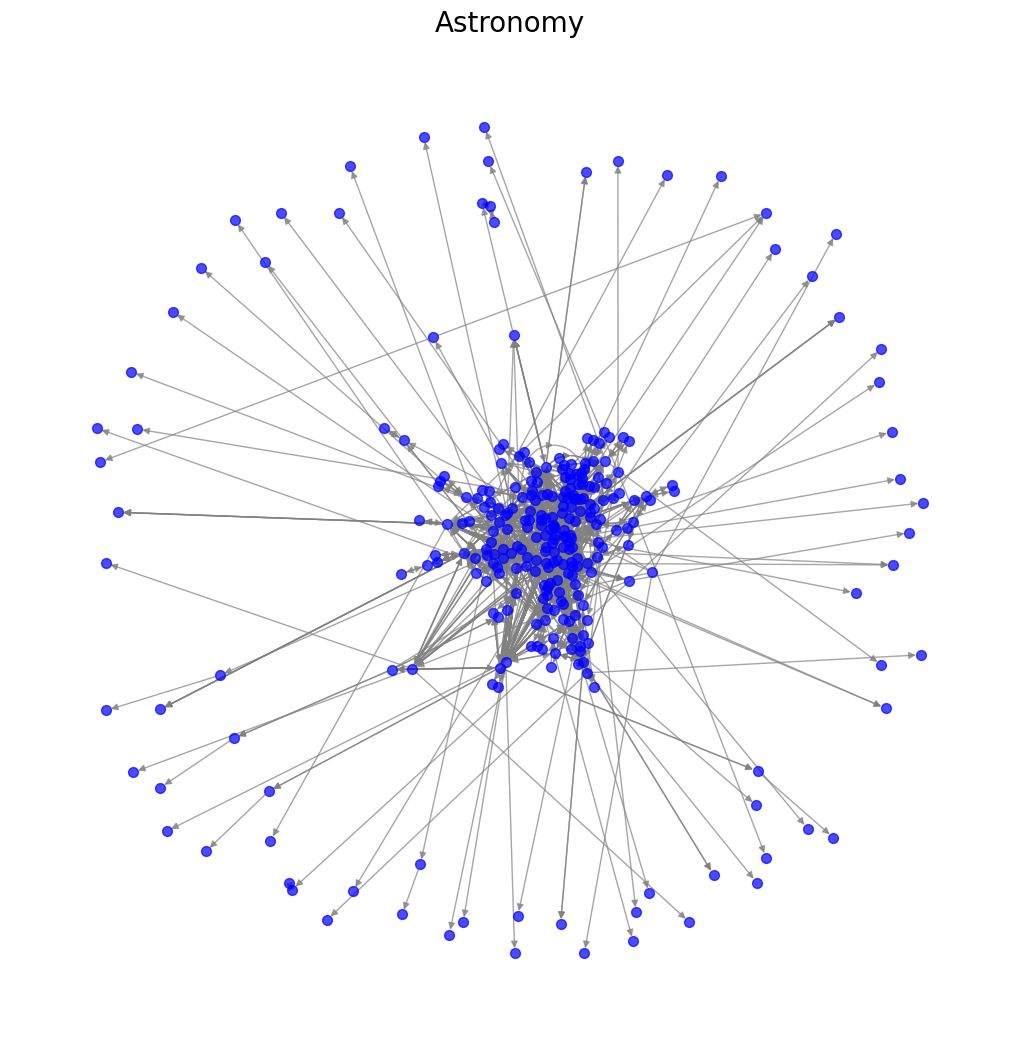

[Weighted] Multigraph Astronomy:
Number of nodes: 296
Number of edges: 3723
[Unweighted] Multigraph Astronomy:
Number of nodes: 296
Number of edges: 1241


In [11]:
draw_multigraph(multigraph_astronomy, "Astronomy")

print(f"""[Weighted] Multigraph Astronomy:
Number of nodes: {multigraph_astronomy.number_of_nodes()}
Number of edges: {multigraph_astronomy.number_of_edges()}""")

multigraph_astronomy = nx.DiGraph(multigraph_astronomy)
print(f"""[Unweighted] Multigraph Astronomy:
Number of nodes: {multigraph_astronomy.number_of_nodes()}
Number of edges: {multigraph_astronomy.number_of_edges()}""")

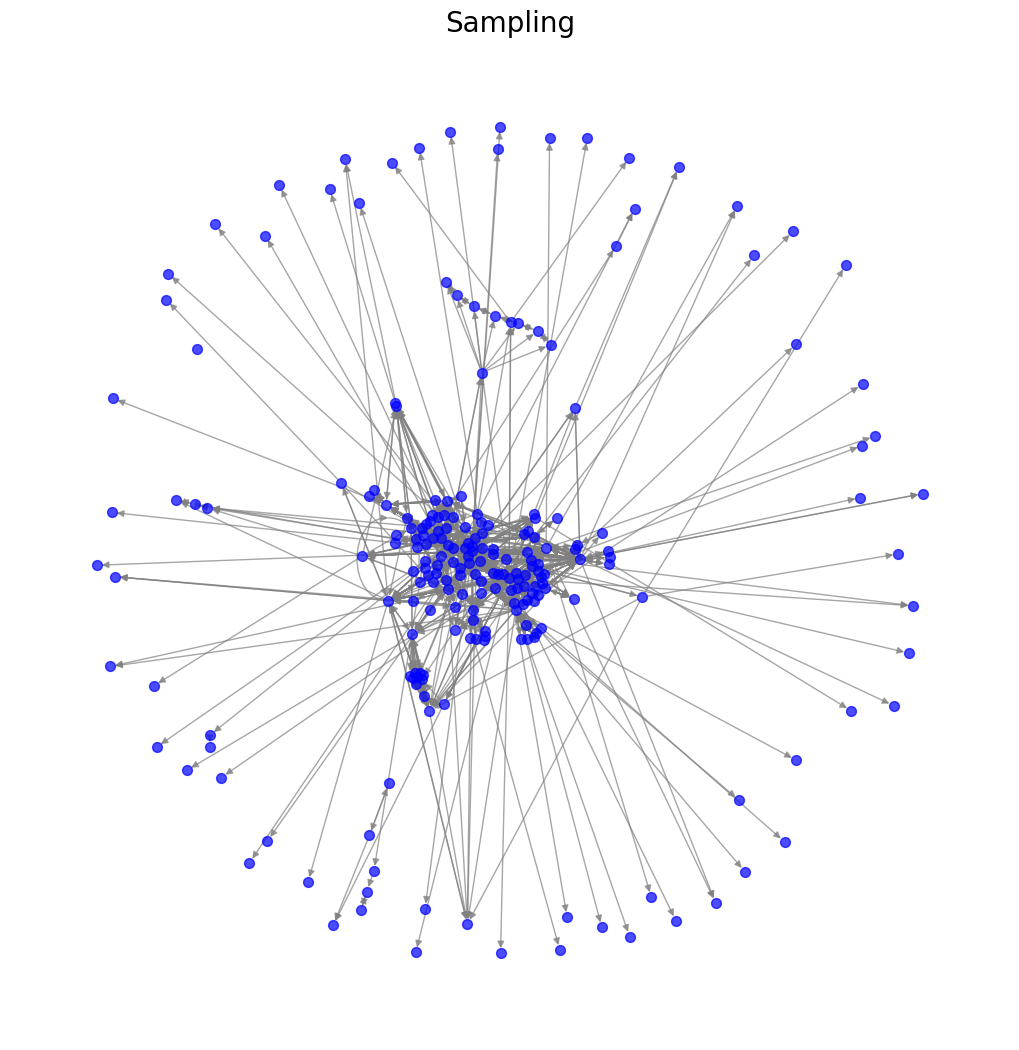

[Weighted] Multigraph Sampling:
Number of nodes: 223
Number of edges: 1898
[Unweighted] Multigraph Sampling:
Number of nodes: 223
Number of edges: 673


In [12]:
draw_multigraph(multigraph_sampling, "Sampling")

print(f"""[Weighted] Multigraph Sampling:
Number of nodes: {multigraph_sampling.number_of_nodes()}
Number of edges: {multigraph_sampling.number_of_edges()}""")

multigraph_sampling = nx.DiGraph(multigraph_sampling)
print(f"""[Unweighted] Multigraph Sampling:
Number of nodes: {multigraph_sampling.number_of_nodes()}
Number of edges: {multigraph_sampling.number_of_edges()}""")

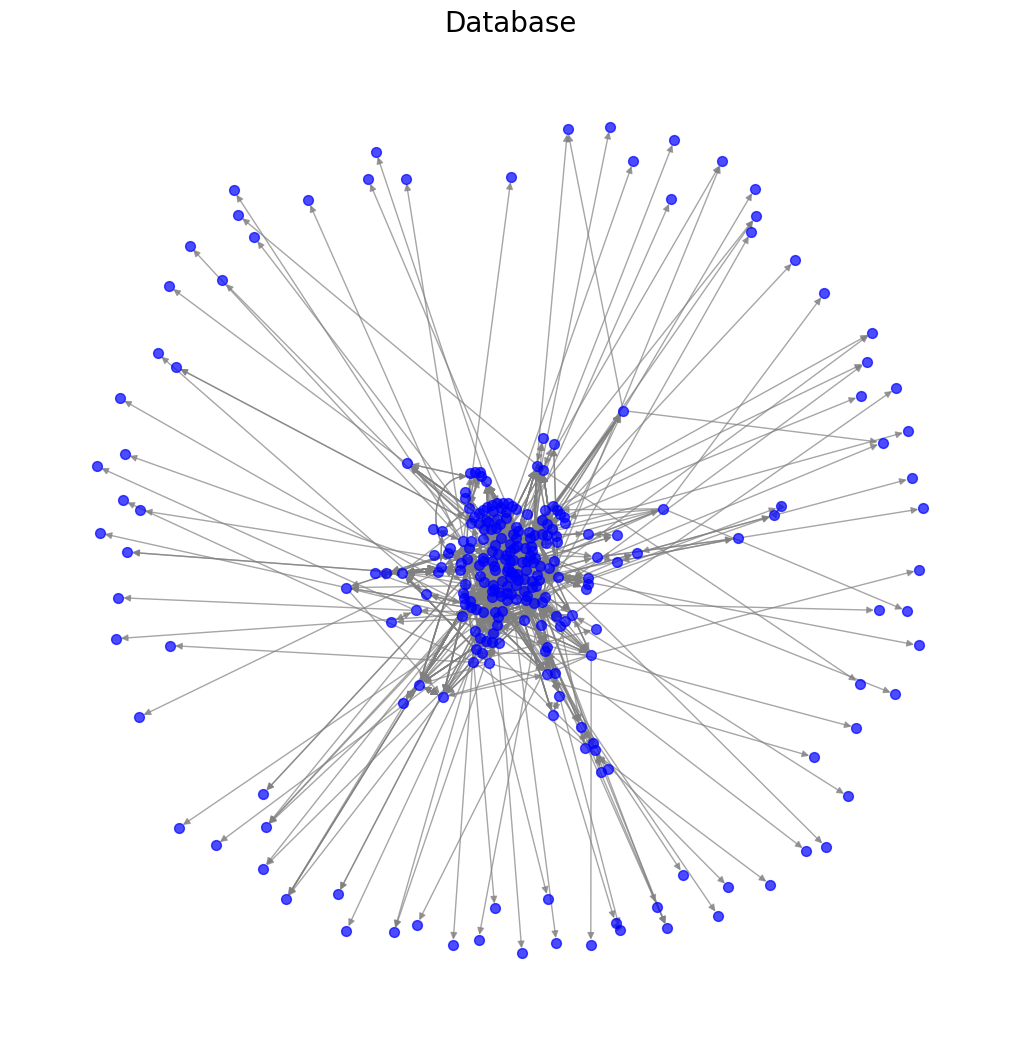

[Weighted] Multigraph Database:
Number of nodes: 282
Number of edges: 2556
[Unweighted] Multigraph Database:
Number of nodes: 282
Number of edges: 1045


In [13]:
draw_multigraph(multigraph_database, "Database")

print(f"""[Weighted] Multigraph Database:
Number of nodes: {multigraph_database.number_of_nodes()}
Number of edges: {multigraph_database.number_of_edges()}""")

multigraph_database = nx.DiGraph(multigraph_database)
print(f"""[Unweighted] Multigraph Database:
Number of nodes: {multigraph_database.number_of_nodes()}
Number of edges: {multigraph_database.number_of_edges()}""")